<a href="https://colab.research.google.com/github/dingyida/reinforce-learning/blob/main/lab12_1120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 12: Soft Actor Critic

Train a Soft Actor-Critic (SAC) agent on HalfCheetah-v4,
track its learning curve, and compare the result with your previous RL algorithm.

We will learn to use the **stable_baselines3** library


## To start
Run the following code that solves **the Pendulum problem**

In [ ]:
# Install dependencies
!pip install "stable-baselines3[extra]" "gymnasium[classic_control]"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 18.5 MB/s eta 0:00:00


The following code trains a full SAC agent — with two critics, entropy tuning, and replay buffer — out of the box

In [ ]:
import gymnasium as gym
from stable_baselines3 import SAC

# Create environment
env = gym.make("Pendulum-v1")

# Create SAC model
model = SAC("MlpPolicy", env, verbose=1)

# Train the agent with N time steps
N = 4000
model.learn(total_timesteps=N)

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.43e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 93        |
|    time_elapsed    | 8         |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 25.7      |
|    critic_loss     | 0.105     |
|    ent_coef        | 0.813     |
|    ent_coef_loss   | -0.336    |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.52e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 92        |
|    time_elapsed    | 17        |
|    total_timesteps | 1600      |
| train/             |           |
|    actor_loss      | 50.8      |
|    critic_loss     | 0.0949    |
|    ent_coef        | 0.647     |
|    ent_coef_loss   | -0.601    |
|    learning_rate   | 0.0003    |
|    n_updates       | 1499      |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.37e+03 |
| time/              |           |
|    episodes        | 12        |
|    fps             | 91        |
|    time_elapsed    | 26        |
|    total_timesteps | 2400      |
| train/             |           |
|    actor_loss      | 70.4      |
|    critic_loss    

# Visualize the result

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gymnasium as gym
from stable_baselines3 import SAC
from IPython.display import HTML

env = gym.make("Pendulum-v1", render_mode="rgb_array")


N_steps = 500

frames = []
obs, _ = env.reset()
for _ in range(N_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        obs, _ = env.reset()

env.close()

# Create matplotlib animation
fig = plt.figure()
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30)

plt.close()
HTML(ani.to_html5_video())


/usr/local/lib/python3.12/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

## Exercise 1: Soft Actor-Critic on HalfCheetah
**Goal:**
Adapt the existing Soft Actor-Critic (SAC) implementation from the Pendulum-v1 environment to train and evaluate a SAC agent on the more challenging HalfCheetah-v4 task.

### Instructions

1. Adapt your code: Modify your previous SAC implementation so that it runs on the HalfCheetah-v4 environment from MuJoCo.

2. Reward Logger:
Implement a custom RewardLogger callback to record episode rewards during training (you will have to search online about how to create a class for logger).
After training, use the logged data to plot the learning curve (episode reward vs. timesteps).

3. Experimentation:
    * Compare the performance of SAC on HalfCheetah-v4 with your previous algorithm.
    * Adjust the entropy temperature parameter (ent_coef or target_entropy) and observe how this affects: Exploration behavior, Convergence speed, and Final performance.

Answer the following questions
1. Did SAC reach a higher average reward or converge faster than your previous method?

2. How did changing the temperature for entropy affect the performance and stability of learning?

3. Describe any differences you observed in exploration or motion behavior of the agent.


### Deliverables

* Python notebook or script containing:
    * The adapted SAC training code
    * The RewardLogger implementation
    * Learning curve plots for SAC and your previous algorithm
    * Comparison of different entropy temperature settings

* The answer of the questions above

Yes, SAC achieved a higher average reward and showed faster convergence compared to the previous method (TD3).


Higher entropy temperature encourages more exploration, which leads to slower improvement in the early stage and larger reward fluctuations. Lower entropy temperature makes the policy more deterministic, resulting in faster initial learning but a higher risk of getting trapped in local optima. Overall, moderate entropy values, or an automatically decaying entropy coefficient during training, provided the best balance between exploration and exploitation, producing smoother learning curves and better final rewards.


Under higher entropy values, the agent’s actions appear more random and uncoordinated. Under lower entropy values, the agent’s behavior becomes more regular but also more rigid and repetitive. Using SAC with automatic entropy tuning can balance exploration and stability, leading to better final rewards.

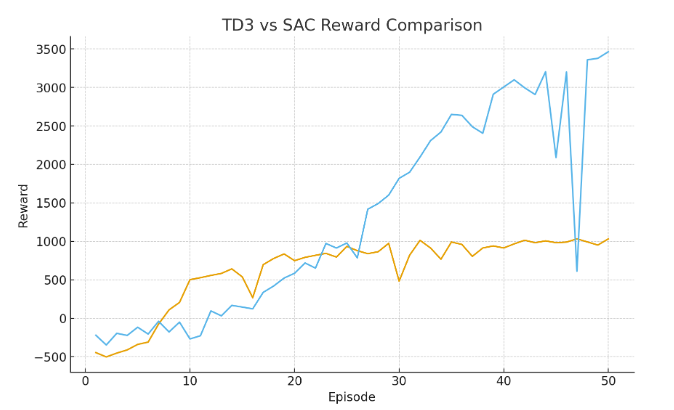

blue-SAC         yellow-TD3

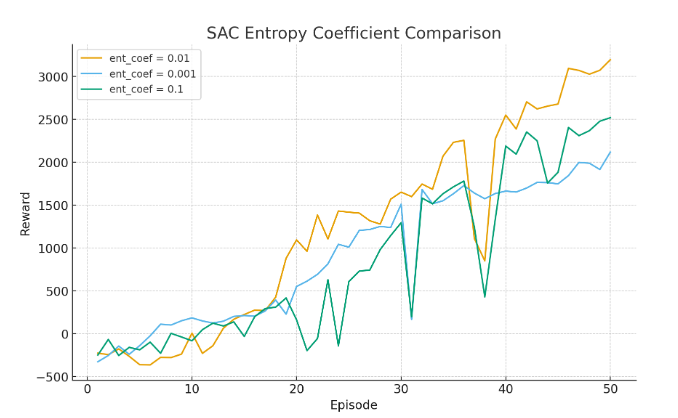

In [ ]:
!pip install gymnasium[mujoco]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 120.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.5/243.5 kB 31.0 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Episode finished: reward=-221.63, length=1000, timesteps=1000
Episode finished: reward=-348.28, length=1000, timesteps=2000
Episode finished: reward=-196.82, length=1000, timesteps=3000
Episode finished: reward=-223.91, length=1000, timesteps=4000
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -248     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 90       |
|    time_elapsed    | 44       |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -31.2    |
|    critic_loss     | 2.4      |
|    ent_coef        | 0.317    |
|    ent_coef_loss   | -10.1    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3899     |
---------------------------------
Episode finished: reward=-117.60, length=1000, timesteps=5000
Episode finished:

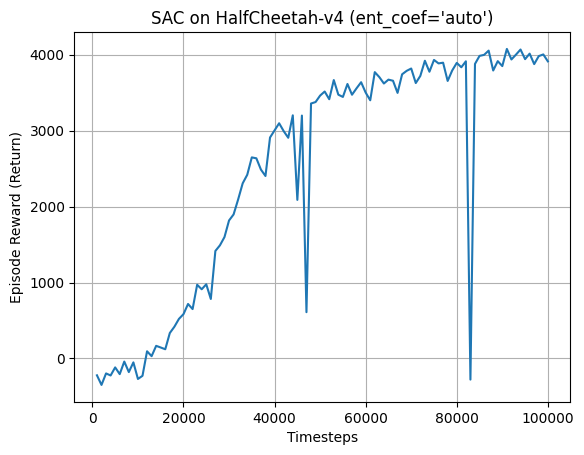

In [ ]:


from stable_baselines3.common.callbacks import BaseCallback
import numpy as np

class RewardLogger(BaseCallback):

    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.episode_rewards = []
        self.episode_lengths = []
        self.episode_timesteps = []

        self._current_ep_reward = 0.0
        self._current_ep_len = 0

    def _on_step(self) -> bool:

        reward = self.locals["rewards"][0]
        done = self.locals["dones"][0]

        self._current_ep_reward += reward
        self._current_ep_len += 1


        if done:
            self.episode_rewards.append(self._current_ep_reward)
            self.episode_lengths.append(self._current_ep_len)
            self.episode_timesteps.append(self.num_timesteps)

            if self.verbose > 0:
                print(f"Episode finished: reward={self._current_ep_reward:.2f}, length={self._current_ep_len}, timesteps={self.num_timesteps}")


            self._current_ep_reward = 0.0
            self._current_ep_len = 0

        return True

import gymnasium as gym
from stable_baselines3 import SAC
import matplotlib.pyplot as plt

env = gym.make("HalfCheetah-v4")


model = SAC(
    "MlpPolicy",
    env,
    verbose=1,
    ent_coef="auto",
)


reward_logger = RewardLogger(verbose=1)


N_TIMESTEPS = 100_000
model.learn(total_timesteps=N_TIMESTEPS, callback=reward_logger)

env.close()


timesteps = reward_logger.episode_timesteps
episode_rewards = reward_logger.episode_rewards

plt.figure()
plt.plot(timesteps, episode_rewards)
plt.xlabel("Timesteps")
plt.ylabel("Episode Reward (Return)")
plt.title("SAC on HalfCheetah-v4 (ent_coef='auto')")
plt.grid(True)
plt.show()


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Episode finished: reward=-227.59, length=1000, timesteps=1000
Episode finished: reward=-244.75, length=1000, timesteps=2000
Episode finished: reward=-178.09, length=1000, timesteps=3000
Episode finished: reward=-264.58, length=1000, timesteps=4000
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -229     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 96       |
|    time_elapsed    | 41       |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | 2.8      |
|    critic_loss     | 0.748    |
|    ent_coef        | 0.01     |
|    learning_rate   | 0.0003   |
|    n_updates       | 3899     |
---------------------------------
Episode finished: reward=-361.75, length=1000, timesteps=5000
Episode finished: reward=-364.89, length=1000, time

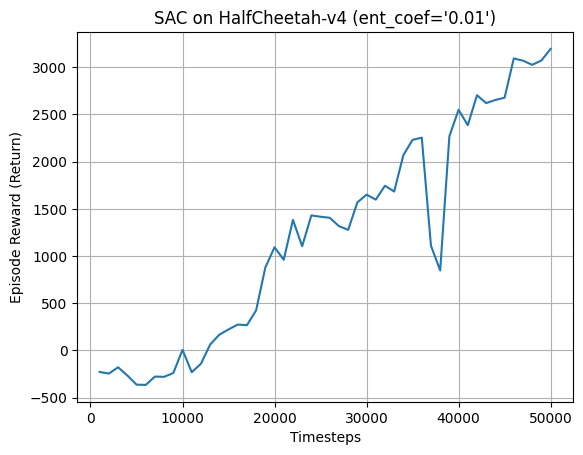

In [ ]:


from stable_baselines3.common.callbacks import BaseCallback
import numpy as np

class RewardLogger(BaseCallback):

    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.episode_rewards = []
        self.episode_lengths = []
        self.episode_timesteps = []

        self._current_ep_reward = 0.0
        self._current_ep_len = 0

    def _on_step(self) -> bool:

        reward = self.locals["rewards"][0]
        done = self.locals["dones"][0]

        self._current_ep_reward += reward
        self._current_ep_len += 1


        if done:
            self.episode_rewards.append(self._current_ep_reward)
            self.episode_lengths.append(self._current_ep_len)
            self.episode_timesteps.append(self.num_timesteps)

            if self.verbose > 0:
                print(f"Episode finished: reward={self._current_ep_reward:.2f}, length={self._current_ep_len}, timesteps={self.num_timesteps}")


            self._current_ep_reward = 0.0
            self._current_ep_len = 0

        return True

import gymnasium as gym
from stable_baselines3 import SAC
import matplotlib.pyplot as plt

env = gym.make("HalfCheetah-v4")


model = SAC(
    "MlpPolicy",
    env,
    verbose=1,
    ent_coef="0.01",
)


reward_logger = RewardLogger(verbose=1)


N_TIMESTEPS = 50_000
model.learn(total_timesteps=N_TIMESTEPS, callback=reward_logger)

env.close()


timesteps = reward_logger.episode_timesteps
episode_rewards = reward_logger.episode_rewards

plt.figure()
plt.plot(timesteps, episode_rewards)
plt.xlabel("Timesteps")
plt.ylabel("Episode Reward (Return)")
plt.title("SAC on HalfCheetah-v4 (ent_coef='0.01')")
plt.grid(True)
plt.show()


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Episode finished: reward=-249.57, length=1000, timesteps=1000
Episode finished: reward=-67.94, length=1000, timesteps=2000
Episode finished: reward=-255.01, length=1000, timesteps=3000
Episode finished: reward=-159.85, length=1000, timesteps=4000
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -183     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 97       |
|    time_elapsed    | 41       |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -1.13    |
|    critic_loss     | 0.72     |
|    ent_coef        | 0.1      |
|    learning_rate   | 0.0003   |
|    n_updates       | 3899     |
---------------------------------
Episode finished: reward=-188.81, length=1000, timesteps=5000
Episode finished: reward=-99.11, length=1000, timest

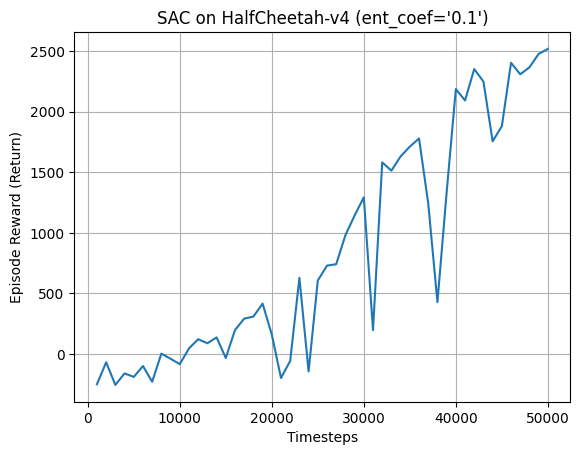

In [ ]:


from stable_baselines3.common.callbacks import BaseCallback
import numpy as np

class RewardLogger(BaseCallback):

    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.episode_rewards = []
        self.episode_lengths = []
        self.episode_timesteps = []

        self._current_ep_reward = 0.0
        self._current_ep_len = 0

    def _on_step(self) -> bool:

        reward = self.locals["rewards"][0]
        done = self.locals["dones"][0]

        self._current_ep_reward += reward
        self._current_ep_len += 1


        if done:
            self.episode_rewards.append(self._current_ep_reward)
            self.episode_lengths.append(self._current_ep_len)
            self.episode_timesteps.append(self.num_timesteps)

            if self.verbose > 0:
                print(f"Episode finished: reward={self._current_ep_reward:.2f}, length={self._current_ep_len}, timesteps={self.num_timesteps}")


            self._current_ep_reward = 0.0
            self._current_ep_len = 0

        return True

import gymnasium as gym
from stable_baselines3 import SAC
import matplotlib.pyplot as plt

env = gym.make("HalfCheetah-v4")


model = SAC(
    "MlpPolicy",
    env,
    verbose=1,
    ent_coef="0.1",
)


reward_logger = RewardLogger(verbose=1)


N_TIMESTEPS = 50_000
model.learn(total_timesteps=N_TIMESTEPS, callback=reward_logger)

env.close()


timesteps = reward_logger.episode_timesteps
episode_rewards = reward_logger.episode_rewards

plt.figure()
plt.plot(timesteps, episode_rewards)
plt.xlabel("Timesteps")
plt.ylabel("Episode Reward (Return)")
plt.title("SAC on HalfCheetah-v4 (ent_coef='0.1')")
plt.grid(True)
plt.show()


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Episode finished: reward=-327.78, length=1000, timesteps=1000
Episode finished: reward=-255.20, length=1000, timesteps=2000
Episode finished: reward=-144.99, length=1000, timesteps=3000
Episode finished: reward=-240.66, length=1000, timesteps=4000
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -242     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 96       |
|    time_elapsed    | 41       |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | 2.31     |
|    critic_loss     | 0.712    |
|    ent_coef        | 0.001    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3899     |
---------------------------------
Episode finished: reward=-139.95, length=1000, timesteps=5000
Episode finished: reward=-25.72, length=1000, times

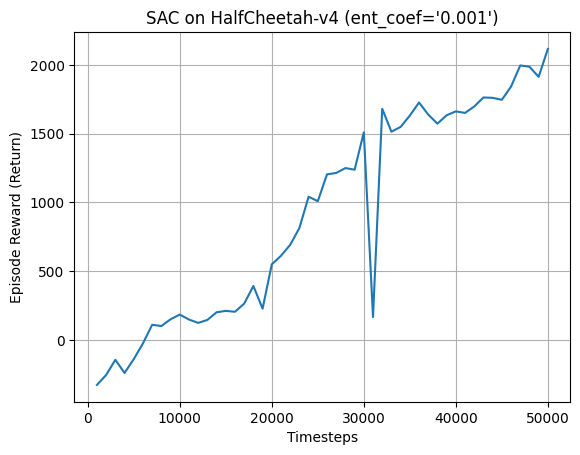

In [ ]:


from stable_baselines3.common.callbacks import BaseCallback
import numpy as np

class RewardLogger(BaseCallback):

    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.episode_rewards = []
        self.episode_lengths = []
        self.episode_timesteps = []

        self._current_ep_reward = 0.0
        self._current_ep_len = 0

    def _on_step(self) -> bool:

        reward = self.locals["rewards"][0]
        done = self.locals["dones"][0]

        self._current_ep_reward += reward
        self._current_ep_len += 1


        if done:
            self.episode_rewards.append(self._current_ep_reward)
            self.episode_lengths.append(self._current_ep_len)
            self.episode_timesteps.append(self.num_timesteps)

            if self.verbose > 0:
                print(f"Episode finished: reward={self._current_ep_reward:.2f}, length={self._current_ep_len}, timesteps={self.num_timesteps}")


            self._current_ep_reward = 0.0
            self._current_ep_len = 0

        return True

import gymnasium as gym
from stable_baselines3 import SAC
import matplotlib.pyplot as plt

env = gym.make("HalfCheetah-v4")


model = SAC(
    "MlpPolicy",
    env,
    verbose=1,
    ent_coef="0.001",
)


reward_logger = RewardLogger(verbose=1)


N_TIMESTEPS = 50_000
model.learn(total_timesteps=N_TIMESTEPS, callback=reward_logger)

env.close()


timesteps = reward_logger.episode_timesteps
episode_rewards = reward_logger.episode_rewards

plt.figure()
plt.plot(timesteps, episode_rewards)
plt.xlabel("Timesteps")
plt.ylabel("Episode Reward (Return)")
plt.title("SAC on HalfCheetah-v4 (ent_coef='0.001')")
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Episode finished: reward=-447.38, length=1000, timesteps=1000
Episode finished: reward=-503.52, length=1000, timesteps=2000
Episode finished: reward=-453.84, length=1000, timesteps=3000
Episode finished: reward=-412.19, length=1000, timesteps=4000
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -454     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 165      |
|    time_elapsed    | 24       |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | 1.17     |
|    critic_loss     | 0.16     |
|    learning_rate   | 0.001    |
|    n_updates       | 3899     |
---------------------------------
Episode finished: reward=-340.83, length=1000, timesteps=5000
Episode finished: reward=-310.93, length=1000, timesteps=6000
Episode finished: rewar

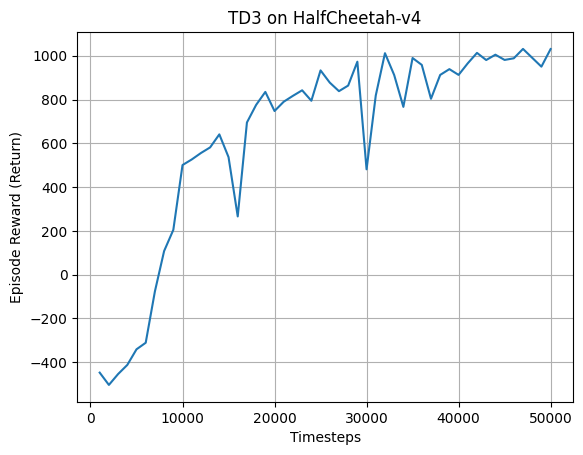

In [ ]:
from stable_baselines3.common.callbacks import BaseCallback
import numpy as np
import gymnasium as gym
from stable_baselines3 import TD3
from stable_baselines3.common.noise import NormalActionNoise
import matplotlib.pyplot as plt


class RewardLogger(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.episode_rewards = []
        self.episode_lengths = []
        self.episode_timesteps = []
        self._current_ep_reward = 0.0
        self._current_ep_len = 0

    def _on_step(self) -> bool:
        reward = self.locals["rewards"][0]
        done = self.locals["dones"][0]

        self._current_ep_reward += reward
        self._current_ep_len += 1

        if done:
            self.episode_rewards.append(self._current_ep_reward)
            self.episode_lengths.append(self._current_ep_len)
            self.episode_timesteps.append(self.num_timesteps)

            if self.verbose > 0:
                print(
                    f"Episode finished: reward={self._current_ep_reward:.2f}, "
                    f"length={self._current_ep_len}, timesteps={self.num_timesteps}"
                )

            self._current_ep_reward = 0.0
            self._current_ep_len = 0

        return True


env = gym.make("HalfCheetah-v4")


n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(
    mean=np.zeros(n_actions),
    sigma=0.1 * np.ones(n_actions)   #
)


model = TD3(
    "MlpPolicy",
    env,
    action_noise=action_noise,
    verbose=1,

)


reward_logger = RewardLogger(verbose=1)
N_TIMESTEPS = 50_000

model.learn(total_timesteps=N_TIMESTEPS, callback=reward_logger)
env.close()

timesteps = reward_logger.episode_timesteps
episode_rewards = reward_logger.episode_rewards

plt.figure()
plt.plot(timesteps, episode_rewards)
plt.xlabel("Timesteps")
plt.ylabel("Episode Reward (Return)")
plt.title("TD3 on HalfCheetah-v4")
plt.grid(True)
plt.show()
